In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier # vecinos más cercanos para clasificación
from sklearn.metrics import accuracy_score # métrica de evaluación
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve, auc
import numpy as np

df = pd.read_csv('../datasets/smokers.csv')
df = df[['hemoglobin', 'height(cm)', 'weight(kg)', 'triglyceride', 'Gtp',
       'waist(cm)', 'serum creatinine', 'dental caries', 'relaxation',
       'fasting blood sugar','smoking', "HDL"]]
X = df.drop(['smoking'], axis=1)
y = df['smoking']


In [2]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
scaler_X = StandardScaler(with_mean=True, with_std=True)
scaler_X.fit(X_train) # entrenamos los valores quitandole la variable clase
X_train.loc[:,X_train.columns] = scaler_X.transform(X_train)
X_test.loc[:,X_test.columns] = scaler_X.transform(X_test)
model = KNeighborsClassifier( 39 )
model.fit(X_train,y_train) # Entrenamos el clasificador
y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.78      0.78      0.78      7400
           1       0.62      0.62      0.62      4296

    accuracy                           0.72     11696
   macro avg       0.70      0.70      0.70     11696
weighted avg       0.72      0.72      0.72     11696



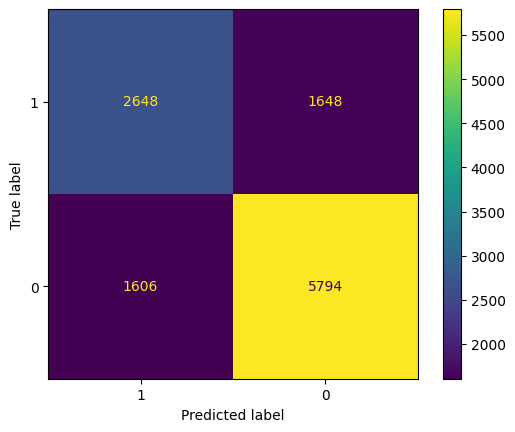

In [3]:
cm = confusion_matrix(y_test, y_pred)
cm = np.rot90(cm, 2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=np.flip(model.classes_))
disp.plot()

Máximo score obtenido para precisión (Y exactitud)

In [4]:
pred_columns = ['triglyceride', 'Gtp', 'hemoglobin', 'serum creatinine']
X_train, X_test, y_train, y_test = train_test_split(X[pred_columns], y, test_size=0.3, stratify=y, random_state=42)
scaler_X = StandardScaler(with_mean=True, with_std=True)
scaler_X.fit(X_train) # entrenamos los valores quitandole la variable clase
X_train.loc[:,X_train.columns] = scaler_X.transform(X_train)
X_test.loc[:,X_test.columns] = scaler_X.transform(X_test)
model = KNeighborsClassifier(metric='euclidean', n_neighbors=69, weights='distance')
model.fit(X_train,y_train) # Entrenamos el clasificador
y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.82      0.82      7400
           1       0.69      0.67      0.68      4296

    accuracy                           0.77     11696
   macro avg       0.75      0.74      0.75     11696
weighted avg       0.76      0.77      0.76     11696



Ordenamos los registros por propensión y modificamos el punto de corte o threshold

In [5]:
dfp = pd.DataFrame(np.sort(model.predict_proba(X_test)[:,1])[::-1], columns=['Propension'])
dfp.sample(10).sort_values('Propension', ascending=False).head(10)

,Propension
699,1.000000
1296,0.742745
2806,0.601096
2868,0.595390
6695,0.280899
8428,0.073732
8612,0.062769
9442,0.025887
9837,0.011166
11305,0.000000


In [6]:
y_pred = (model.predict_proba(X_test)[:,1]>0.6)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.91      0.83      7400
           1       0.76      0.50      0.60      4296

    accuracy                           0.76     11696
   macro avg       0.76      0.71      0.72     11696
weighted avg       0.76      0.76      0.75     11696

